## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 19.09.2023

Мягкий дедлайн: 23:59MSK 02.10.2023

Жесткий дедлайн: 23:59MSK 06.10.2023

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [3]:
print('Hello MO-1')

Hello MO-1


[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб? 

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [4]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [5]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

zsh:1: command not found: wget


Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [ ]:
# !powershell iwr -outf somefile https://somesite/somefile

In [ ]:
# !pip install wget
# import wget 
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [9]:
data = pd.read_excel('_end_seminar.xlsx')
data.head(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN
5,2020-05-15 09:10:18.558,d0d8ff53ed5b119f9056068e954256c6,591,187.0,NaN,Язык SQL,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Численные методы,Дискретная оптимизация,Да,0.690583,NaN,NaN,NaN
6,2020-05-15 11:42:16.910,e4caca755ee0bdd711e18fb8084958b5,724,181.0,NaN,Statistical Learning Theory,Безопасность компьютерных систем,Моделирование временных рядов,Численные методы,Промышленное программирование на языке Java,Машинное обучение 2,Да,0.103139,NaN,NaN,NaN
7,2020-05-15 12:11:43.252,8047c18b3c531c6f47931e0744f3e028,566,187.0,NaN,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.802691,NaN,NaN,NaN
8,2020-05-15 13:21:40.913,e8b314842f176be9051d14a07cb156cb,618,181.0,NaN,Язык SQL,Теория баз данных,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.565022,NaN,NaN,NaN
9,2020-05-15 13:29:10.789,d6c079f1ff869c8c84fa3ed30bd67e0e,733,181.0,NaN,Теория баз данных,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Анализ данных в бизнесе,Численные методы,Да,0.085202,NaN,NaN,1.0


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [53]:
nulls = data.isnull().sum()
nulls

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [139]:
dtypes = data.dtypes
fill = dtypes[nulls != 0]
objects = fill[fill==dtype('O')].index
numbers = fill[fill!=dtype('O')].index
data[objects] = data[objects].fillna('')
data[numbers] = data[numbers].fillna(0)

In [140]:
data

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0


#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [589]:
inds = d.groupby('id')['timestamp'].head(1).index
data1 = data.drop(index=inds)

In [591]:
data1

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0


#### 4. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [592]:
g17 = data1['17_group'].value_counts()
g17

0.0      213
172.0     28
171.0     26
175.0     26
173.0     19
176.0     17
174.0     15
177.0      3
Name: 17_group, dtype: int64

In [593]:
print(f'Из 17-го года набора было {g17.drop(0).sum()} заявки')

Из 17-го года набора было 134 заявки


In [594]:
g18 = data1['18_group'].value_counts()
g18

0.0      134
183.0     31
187.0     30
185.0     28
181.0     27
186.0     27
182.0     26
188.0     23
184.0     21
Name: 18_group, dtype: int64

In [595]:
print(f'Из 18-го года набора было {g18.drop(0).sum()} заявок')

Из 18-го года набора было 213 заявок


#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)? 

In [596]:
s = ', '.join(data1['blended'].unique()[1:])
print(f'Для четверокурсников доступны следующие курсы: {s}')

Для четверокурсников доступны следующие курсы: DevOps, Введение в дифференциальную геометрию, Соревновательный анализ данных


In [597]:
g = data1['blended'].value_counts()[1:]
g

DevOps                                   87
Соревновательный анализ данных           32
Введение в дифференциальную геометрию    15
Name: blended, dtype: int64

Больше всего студентов записались на курс DevOps

In [598]:
gb = data.groupby(by='blended')['rating'].mean()[1:]
gb

blended
DevOps                                   1152.989011
Введение в дифференциальную геометрию    1210.733333
Соревновательный анализ данных           1144.218750
Name: rating, dtype: float64

In [599]:
print(f'На курсе Введение в дифференциальную геометрию собрались студенты с самым высоким средним рейтингом: {1210.733333}')
print(f'На этом курсе обучается 32 студента')

На курсе Введение в дифференциальную геометрию собрались студенты с самым высоким средним рейтингом: 1210.733333
На этом курсе обучается 32 студента


#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [600]:
h = data1[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].value_counts()
h[h>1]

fall_1                                           fall_2                                           fall_3                                           spring_1                                                spring_2                                     spring_3                                     blended
Безопасность компьютерных систем                 Высокопроизводительные вычисления                Язык SQL                                         Компьютерные сети                                       Промышленное программирование на языке Java  Дискретная оптимизация                                  3
                                                 Statistical Learning Theory                      Матричные вычисления                             Дискретная оптимизация                                  Промышленное программирование на языке Java  Дополнительные главы прикладной статистики              3
Statistical Learning Theory                      Анализ неструктурированных данных     

#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [601]:
kurs17 = data1[data1['17_group']!=0]
kurs17 = kurs17[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].values.reshape(-1,)
kurs17 = np.unique(kurs17)
print(f'Курсы, на которые записывались студенты 17-го года: \n{kurs17.tolist()}')

Курсы, на которые записывались студенты 17-го года: 
['DevOps', 'Statistical Learning Theory', 'Анализ неструктурированных данных', 'Байесовские методы машинного обучения', 'Безопасность компьютерных систем', 'Введение в дифференциальную геометрию', 'Высокопроизводительные вычисления', 'Генеративные модели в машинном обучении', 'Глубинное обучение в обработке звука', 'Компьютерное зрение', 'Конфликты и кооперация', 'Методы сжатия и передачи медиаданных', 'Моделирование временных рядов', 'Обучение с подкреплением', 'Принятие решений в условиях риска и неопределённости', 'Проектирование и разработка высоконагруженных сервисов', 'Сбор и обработка данных с помощью краудсорсинга', 'Символьные вычисления', 'Соревновательный анализ данных', 'Численные методы']


In [602]:
kurs18 = data1[data1['18_group']!=0]
kurs18 = kurs18[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].values.reshape(-1,)
kurs18 = np.unique(kurs18)
print(f'Курсы, на которые записывались студенты 18-го года: \n{kurs18.tolist()}')

Курсы, на которые записывались студенты 18-го года: 
['', 'Statistical Learning Theory', 'Анализ данных в бизнесе', 'Безопасность компьютерных систем', 'Высокопроизводительные вычисления', 'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Компьютерные сети', 'Матричные вычисления', 'Машинное обучение 2', 'Моделирование временных рядов', 'Принятие решений в условиях риска и неопределённости', 'Промышленное программирование на языке Java', 'Сбор и обработка данных с помощью краудсорсинга', 'Системы баз данных', 'Теория баз данных', 'Численные методы', 'Язык SQL']


In [603]:
print(f'Курсы, на которые записывались оба года: \n{np.intersect1d(kurs17, kurs18)}')

Курсы, на которые записывались оба года: 
['Statistical Learning Theory' 'Безопасность компьютерных систем'
 'Высокопроизводительные вычисления' 'Моделирование временных рядов'
 'Принятие решений в условиях риска и неопределённости'
 'Сбор и обработка данных с помощью краудсорсинга' 'Численные методы']


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [604]:
print(f'Курсы, которые предлагались только студентам 17-го года: \n{np.setdiff1d(kurs17, kurs18)}')

Курсы, которые предлагались только студентам 17-го года: 
['DevOps' 'Анализ неструктурированных данных'
 'Байесовские методы машинного обучения'
 'Введение в дифференциальную геометрию'
 'Генеративные модели в машинном обучении'
 'Глубинное обучение в обработке звука' 'Компьютерное зрение'
 'Конфликты и кооперация' 'Методы сжатия и передачи медиаданных'
 'Обучение с подкреплением'
 'Проектирование и разработка высоконагруженных сервисов'
 'Символьные вычисления' 'Соревновательный анализ данных']


In [605]:
print(f'Курсы, которые предлагались только студентам 18-го года: \n{np.setdiff1d(kurs18, kurs17)}')

Курсы, которые предлагались только студентам 18-го года: 
['' 'Анализ данных в бизнесе' 'Дискретная оптимизация'
 'Дополнительные главы прикладной статистики' 'Компьютерные сети'
 'Матричные вычисления' 'Машинное обучение 2'
 'Промышленное программирование на языке Java' 'Системы баз данных'
 'Теория баз данных' 'Язык SQL']


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [606]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')
mpl.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.figsize'] = 12, 7

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [607]:
data1['day'] = data1['timestamp'].apply(lambda x: x.date())
data1['day']

0      2020-05-15
1      2020-05-15
2      2020-05-15
3      2020-05-15
4      2020-05-15
          ...    
356    2020-05-19
357    2020-05-19
358    2020-05-20
359    2020-05-23
360    2020-05-23
Name: day, Length: 347, dtype: object

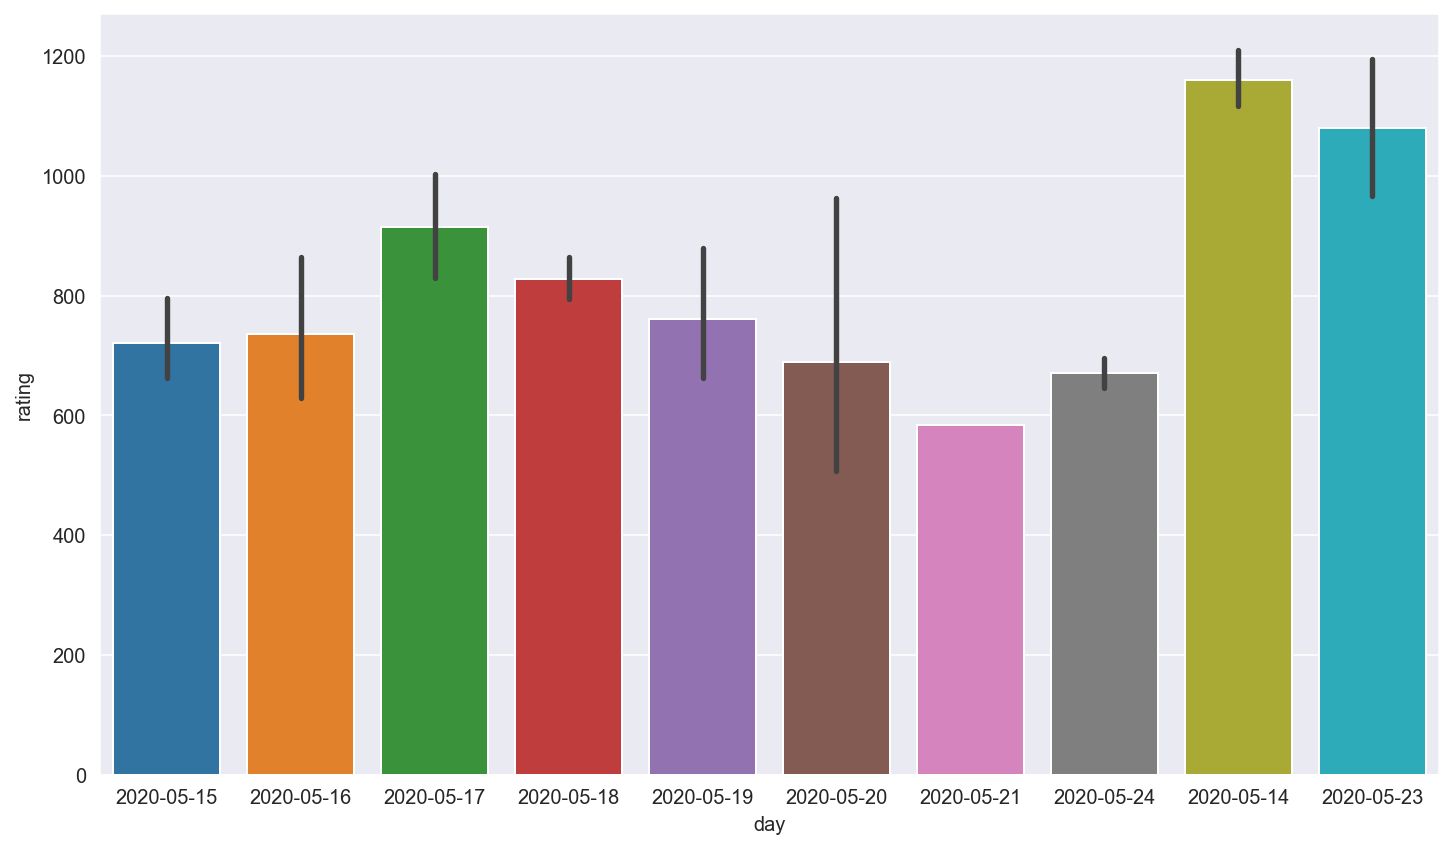

In [608]:
sns.barplot(x='day', y='rating', data=data1)
plt.savefig("seaborn_plot.png");

Сохраните график в формате pdf (так он останется векторизованным).

Сохранил выше!

### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [609]:
assert data1.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert data1.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [610]:
data1

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,day
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,2020-05-15
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,2020-05-15
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,2020-05-15
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,2020-05-15
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,2020-05-19
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,2020-05-19
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2020-05-20
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2020-05-23


In [766]:
gr_17 = data1['17_group'].copy()
gr_17[(gr_17 == 172) | (gr_17 == 173)] = 2
gr_17[(gr_17 != 2) & (gr_17 != 0)] = 1


gr_18 = data1['18_group'].copy()
gr_18[data1['is_mi']==1] = 2
gr_18[(gr_18!=2) & (gr_18 != 0)] = 1

groups = gr_17 + gr_18

data1['n_courses'] = groups

data1

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,day,n_courses,is_first_place,is_last_place
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,2020-05-15,1.0,True,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,2020-05-15,1.0,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,2020-05-15,1.0,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,2020-05-15,1.0,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,2020-05-15,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,2020-05-19,1.0,NaN,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,2020-05-19,1.0,NaN,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2020-05-20,2.0,NaN,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2020-05-23,2.0,NaN,NaN


Проверка:

In [613]:
col_name = 'n_courses'   # insert your new column name as str

assert(data1[data1['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(data1[data1['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(data1[data1['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(data1[data1['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [617]:
a = data1[data1['n_courses']==1].groupby(['fall_1', 'id'])['rating'].sum().reset_index().sort_values(['fall_1', 'rating'], ascending=False).groupby('fall_1').head(30)
a

,fall_1,id,rating
269,Язык SQL,93ff79a51cd602f1dd3028ba2c129503,698
263,Язык SQL,4b019ecb89626c8752a1d962b63c8a4b,669
275,Язык SQL,c7f347b466ff14ec85103f61c4d6ff8e,640
283,Язык SQL,fc2c60b8004aa91bc272df84628621ff,639
264,Язык SQL,4d7035f3a6d0c55c4fbcf4031679545a,621
...,...,...,...
5,Statistical Learning Theory,6256514074c4680d1b14e4f2a863fd78,596
9,Statistical Learning Theory,88ae08d9db8d34b267780ed642d0d2db,581
1,Statistical Learning Theory,1528f0eaa027580820ccf0d92a53ad68,579
0,Statistical Learning Theory,1386d00c9c8229c2be3c0956949ee122,545


In [901]:
spots = {'Statistical Learning Theory':60, 'Высокопроизводительные вычисления':60, 
             'Анализ неструктурированных данных':1000000}
gr1 = data1[data1['n_courses']==1].groupby(['fall_1', 'id'])['rating'].sum().reset_index()
gr2 = data1[data1['n_courses']==2].groupby(['fall_1', 'fall_2', 'id'])['rating'].sum().reset_index()
gr1 = gr1.rename(columns={'fall_1':'fall'})
h1 = gr2.drop(columns='fall_1').rename(columns={'fall_2':'fall'})
h2 = gr2.drop(columns='fall_2').rename(columns={'fall_1':'fall'})
gr2 = pd.concat([h1, h2])
grs = pd.concat([gr1, gr2])
grs = grs.sort_values(by=['fall', 'rating'], ascending=False)

res = grs[~grs['fall'].isin(spots)].groupby('fall').head(30)

for i, j in zip(spots.keys(), spots.values()):
    a = grs[grs['fall'] == i].head(j)
    res = pd.concat([res, a])
  
res

,fall,id,rating
269,Язык SQL,93ff79a51cd602f1dd3028ba2c129503,698
51,Язык SQL,b8dab0479a00af2eb75deaf54dd9a442,697
263,Язык SQL,4b019ecb89626c8752a1d962b63c8a4b,669
61,Язык SQL,9015b809a29fb65ce23d7addf16d770d,665
275,Язык SQL,c7f347b466ff14ec85103f61c4d6ff8e,640
...,...,...,...
21,Анализ неструктурированных данных,c749f69f66d40cdfb3821745951be896,1017
10,Анализ неструктурированных данных,de539be8b29b3afa002184e28d63c670,1015
26,Анализ неструктурированных данных,b739739c7080a6e15f962c3863021855,1003
18,Анализ неструктурированных данных,c1e88502b6673d22c38ee1352e3a1dd9,985


In [902]:
spots_occupied = dict(res['fall'].value_counts())
spots_occupied 


{'Высокопроизводительные вычисления': 44,
 'Анализ неструктурированных данных': 40,
 'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Моделирование временных рядов': 30,
 'Безопасность компьютерных систем': 30,
 'Statistical Learning Theory': 30,
 'Язык SQL': 29,
 'Байесовские методы машинного обучения': 21,
 'Глубинное обучение в обработке звука': 17,
 'Матричные вычисления': 15,
 'Теория баз данных': 14,
 'Принятие решений в условиях риска и неопределённости': 8}

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [903]:
check_df = pd.read_csv('_2_task_check.csv')
check_df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,is_first_place,is_last_place
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,NaN,0.0,True,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,NaN,0.0,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,NaN,0.0,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,NaN,0.0,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,NaN,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,NaN,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,NaN,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,NaN,NaN


После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [904]:
maxs = res.groupby('fall').head(1).id.tolist()
mins = res.groupby('fall').tail(1).id.tolist()
mins

['feb53dcdd28fff9dc4a981c3419fea6f',
 'bb94ed5af639819dac15574197c80da3',
 '68f1b5165e9e310fcf920fb903117061',
 '7a21ef645ecb42198be493dd65320e78',
 '6cd7de3774f07c65e44668cdf7e987b6',
 'd9f0e5ebc6718202b86eaee2de1c697b',
 'd555d2805e1d93d4f023e57dc4c8f403',
 'ba4091ee80dd63a042464dbd2a7e3363',
 '98c5a2548d93f26bd4195466e93178b3',
 'af20596134e83f3ca61259b325aa9688',
 'b4f1f195bd1bc63490a7bc42275a71cd',
 'd539461bf254cf8b3201cdf7990b119e']

In [905]:
data1.loc[data1['id'].isin(maxs), 'is_first_place'] = True
data1.loc[data1['id'].isin(mins), 'is_last_place'] = True
data1

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,day,n_courses,is_first_place,is_last_place
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,2020-05-15,1.0,True,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,2020-05-15,1.0,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,2020-05-15,1.0,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,2020-05-15,1.0,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,2020-05-15,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,2020-05-19,1.0,NaN,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,2020-05-19,1.0,NaN,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2020-05-20,2.0,NaN,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2020-05-23,2.0,NaN,NaN


In [906]:
df = data1.drop(columns=['day', 'n_courses']).reset_index().drop(columns='index')
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,is_first_place,is_last_place
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,True,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,NaN,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,NaN,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,NaN,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,NaN,NaN


In [907]:
fir_col_name = 'is_first_place'     # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'    # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       == 
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

ValueError: Can only compare identically-labeled DataFrame objects

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [908]:
st_2_c = data1[data1['n_courses']==2].id.values
st_1_c = data1[data1['n_courses']==1].id.values
j = res.id.value_counts()
st_2_c_p = j[j==2].index
st_1_c_p = j[(j==1) & (j.index.isin(st_1_c))].index

spots_occupied
spots_left = {}
for c in spots_occupied.keys():
    if c in spots:
        spots_left[c] = spots[c] - spots_occupied[c]
    else:
        spots_left[c] = 30 - spots_occupied[c]
        
spots_left

{'Высокопроизводительные вычисления': 16,
 'Анализ неструктурированных данных': 999960,
 'Сбор и обработка данных с помощью краудсорсинга': 0,
 'Моделирование временных рядов': 0,
 'Безопасность компьютерных систем': 0,
 'Statistical Learning Theory': 30,
 'Язык SQL': 1,
 'Байесовские методы машинного обучения': 9,
 'Глубинное обучение в обработке звука': 13,
 'Матричные вычисления': 15,
 'Теория баз данных': 16,
 'Принятие решений в условиях риска и неопределённости': 22}

In [909]:
gr1_2 = data1[data1['n_courses']==1].groupby(['fall_2', 'id'])['rating'].sum().reset_index()
gr2_2 = data1[data1['n_courses']==2].groupby(['fall_3', 'id'])['rating'].sum().reset_index()
gr1_2 = gr1_2.rename(columns={'fall_2':'fall'})
gr2_2 = gr2_2.rename(columns={'fall_3':'fall'})
grs_2 = pd.concat([gr1_2, gr2_2])
grs_2 = grs_2.sort_values(by=['fall', 'rating'], ascending=False)
grs_2 = grs_2[~grs_2['id'].isin(st_2_c_p)]
grs_2 = grs_2[~grs_2['id'].isin(st_1_c_p)]

for key in spots_left.keys():
    if spots_left[key] == 0:
        continue
    else:
        top = grs_2[grs_2['fall'] == key].head(spots_left[key])
        res = pd.concat([res, top])

res

,fall,id,rating
269,Язык SQL,93ff79a51cd602f1dd3028ba2c129503,698
51,Язык SQL,b8dab0479a00af2eb75deaf54dd9a442,697
263,Язык SQL,4b019ecb89626c8752a1d962b63c8a4b,669
61,Язык SQL,9015b809a29fb65ce23d7addf16d770d,665
275,Язык SQL,c7f347b466ff14ec85103f61c4d6ff8e,640
...,...,...,...
241,Теория баз данных,cc8e710c871ae8236b8b8705e6840793,559
240,Теория баз данных,c97ab5cabace9f00673cc8384771aa9c,552
238,Теория баз данных,bd416140ecdb32b6dbd7f40820bf63b1,518
43,Принятие решений в условиях риска и неопределё...,2662600c2c37e11e62f6ee0b88452f22,627


In [910]:
spots_occupied_2 = dict(res['fall'].value_counts())
spots_occupied_2 

{'Высокопроизводительные вычисления': 60,
 'Анализ неструктурированных данных': 41,
 'Statistical Learning Theory': 40,
 'Язык SQL': 30,
 'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Моделирование временных рядов': 30,
 'Безопасность компьютерных систем': 30,
 'Матричные вычисления': 27,
 'Теория баз данных': 23,
 'Байесовские методы машинного обучения': 22,
 'Глубинное обучение в обработке звука': 18,
 'Принятие решений в условиях риска и неопределённости': 10}

In [915]:
st_2_c = data1[data1['n_courses']==2].id.values
st_1_c = data1[data1['n_courses']==1].id.values
j = res.id.value_counts()
st_2_c_p = j[j==2].index
st_1_c_p = j[(j==1) & (j.index.isin(st_1_c))].index

spots_left_3 = {}
for c in spots_occupied_2.keys():
    if c in spots:
        spots_left_3[c] = spots[c] - spots_occupied_2[c]
    else:
        spots_left_3[c] = 30 - spots_occupied_2[c]
        
spots_left_3

{'Высокопроизводительные вычисления': 0,
 'Анализ неструктурированных данных': 999959,
 'Statistical Learning Theory': 20,
 'Язык SQL': 0,
 'Сбор и обработка данных с помощью краудсорсинга': 0,
 'Моделирование временных рядов': 0,
 'Безопасность компьютерных систем': 0,
 'Матричные вычисления': 3,
 'Теория баз данных': 7,
 'Байесовские методы машинного обучения': 8,
 'Глубинное обучение в обработке звука': 12,
 'Принятие решений в условиях риска и неопределённости': 20}

In [916]:
gr1_3 = data1[data1['n_courses']==1].groupby(['fall_3', 'id'])['rating'].sum().reset_index()

gr1_3 = gr1_3.rename(columns={'fall_3':'fall'})
grs_3 = gr1_3.sort_values(by=['fall', 'rating'], ascending=False)
grs_3 = grs_3[~grs_3['id'].isin(st_1_c_p)]

for key in spots_left_3.keys():
    if spots_left_3[key] == 0:
        continue
    else:
        top = grs_3[grs_3['fall'] == key].head(spots_left_3[key])
        res = pd.concat([res, top])

res

,fall,id,rating
269,Язык SQL,93ff79a51cd602f1dd3028ba2c129503,698
51,Язык SQL,b8dab0479a00af2eb75deaf54dd9a442,697
263,Язык SQL,4b019ecb89626c8752a1d962b63c8a4b,669
61,Язык SQL,9015b809a29fb65ce23d7addf16d770d,665
275,Язык SQL,c7f347b466ff14ec85103f61c4d6ff8e,640
...,...,...,...
235,Теория баз данных,8aa0f1b7331b49464174b02cd693be52,567
233,Теория баз данных,86c24daaa62246142d46ee58534a65e0,530
241,Теория баз данных,f5d9f99cb876ca0888d18b6e444fa1b1,516
176,Принятие решений в условиях риска и неопределё...,105209181e880d891f19de83b4b1478d,706


In [1041]:
a = res.groupby('id')['fall'].unique()
for i in a.index:
    if len(a[i]) == 1:
        a[i] = np.append(a[i], np.nan)
res_fall = pd.DataFrame(a.to_dict()).T.reset_index()
res_fall = res_fall.rename(columns={'index' : 'ID', 0 : 'course1', 1 : 'course2'})
res_fall

ids = data1['id'].unique()
all_st = pd.DataFrame({'ID' : ids})

st_2_c = data1[data1['n_courses']==2].id.values

res_fall = pd.merge(res_fall, all_st, how='right')
res_fall['course1'] = res_fall['course1'].fillna('???')
res_fall[res_fall['ID'].isin(st_2_c)] = res_fall[res_fall['ID'].isin(st_2_c)].fillna('???')
res_fall = res_fall.fillna('-')
res_fall = res_fall.sort_values(by='ID')
res_fall

,ID,course1,course2
154,00b40fe7dbfd23e5daba765244509415,???,-
74,014b72217e20370dab7acc48b20c47be,Statistical Learning Theory,-
321,01b072a0cdb45814fc4ab8ca3e621f0e,Сбор и обработка данных с помощью краудсорсинга,Анализ неструктурированных данных
86,044e038535ae5d2ff037150b77fdc6d1,Statistical Learning Theory,-
76,04b88fcbe5ba58aa8369c7de5e574de0,???,-
...,...,...,...
130,feb53dcdd28fff9dc4a981c3419fea6f,Язык SQL,???
270,fecff7bd30995d16b59fb392d47b3760,Анализ неструктурированных данных,-
100,ff549c331d45453052f28ad2614afda9,Моделирование временных рядов,-
295,ffc04c64d068f8d85e4dc44e7f297ecc,Байесовские методы машинного обучения,-


In [1042]:
res_fall.to_csv('res_fall.csv', index=None)

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/52663/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего. 

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [ ]:
# (￣^'￣)ゞ

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/52663/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания: